![Traffic lights over urban intersection.](traffic.jpg)

**Challenges in Traffic Sign Management**

Traffic signs convey vital information to drivers. However, their effectiveness can be hindered by various factors, such as their visibility under different lighting conditions or the presence of obstructions.


**Training Traffic Sign Detection Models**

To address these challenges and enhance stop sign and traffic light detection capabilities, advanced technologies such as deep learning and computer vision have gained significant attention. In this project, you'll train an object detection model on 6 images of stop signs and 6 images of traffic lights, taken from various angles and lighting conditions. This training teaches the model to classify and locate these signs in images, improving its robustness and reliability for real-world applications.

Epoch 1/20
1/1 [==============================] - 1s 661ms/step - loss: 3.0954 - accuracy: 0.6667
Epoch 2/20
1/1 [==============================] - 0s 383ms/step - loss: 28.4303 - accuracy: 0.5833
Epoch 3/20
1/1 [==============================] - 0s 395ms/step - loss: 92.5958 - accuracy: 0.5000
Epoch 4/20
1/1 [==============================] - 0s 318ms/step - loss: 29.0004 - accuracy: 0.5833
Epoch 5/20
1/1 [==============================] - 0s 376ms/step - loss: 5.7493 - accuracy: 0.8333
Epoch 6/20
1/1 [==============================] - 0s 312ms/step - loss: 6.3856 - accuracy: 0.7500
Epoch 7/20
1/1 [==============================] - 0s 393ms/step - loss: 3.7162 - accuracy: 0.6667
Epoch 8/20
1/1 [==============================] - 0s 382ms/step - loss: 0.0488 - accuracy: 1.0000
Epoch 9/20
1/1 [==============================] - 0s 319ms/step - loss: 0.0318 - accuracy: 1.0000
Epoch 10/20
1/1 [==============================] - 0s 386ms/step - loss: 0.0039 - accuracy: 1.0000
Epoch 11/20
1/1 

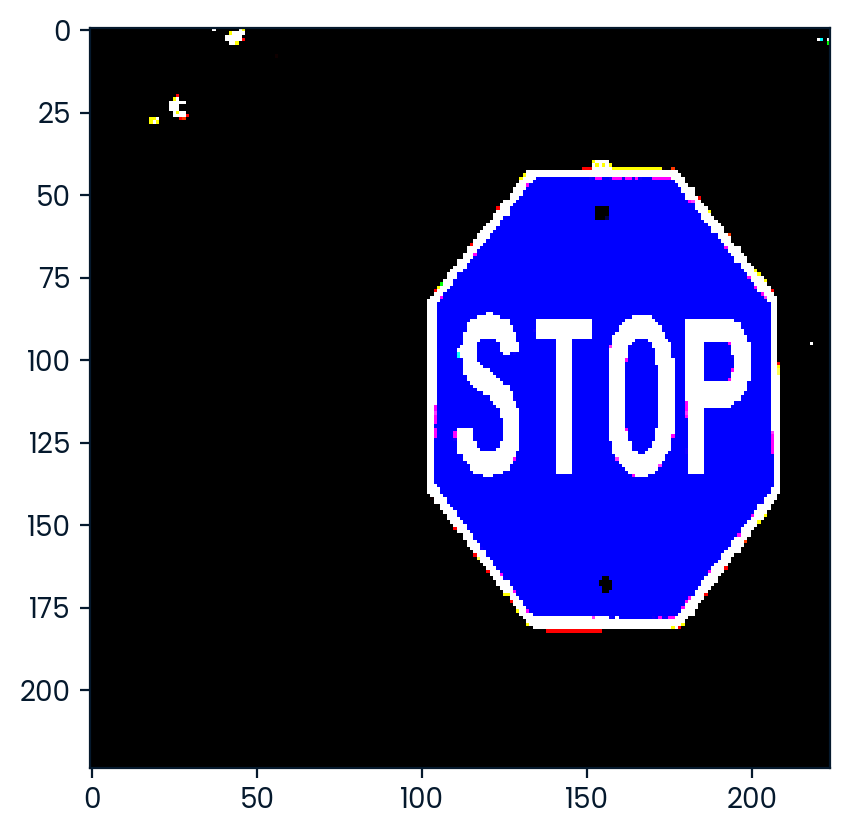

In [3]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

# Load a preprocessed images and the corresponding labels
image, labels = np.load('batch.npy',allow_pickle=True).tolist()

# hyperparameters
input_size = image.shape[1] # dimension of input image
num_classes = labels['classifier_head'].shape[1] # number of classes
DROPOUT_FACTOR = 0.2 # dropout probability

# visualize one example preprocessed image
plt.imshow(image[2])

# Create a sequential model - a linear stack of layers
model = keras.Sequential()

# Feature extractor: This part of the model extracts features from the input images
# Convolutional layer with 16 filters, each filter with a size of 3x3, using ReLU activation function
# Input shape is the size of the input image: (input_size, input_size, 3) - 3 channels for RGB images
model.add(keras.layers.Conv2D(16, kernel_size=3, activation='relu', input_shape=(input_size, input_size, 3)))
# Average pooling layer to reduce spatial dimensions by taking the average value in each 2x2 patch
model.add(keras.layers.AveragePooling2D(2, 2))
# Add another convolutional layer with 32 filters and ReLU activation
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu'))
# Another average pooling layer
model.add(keras.layers.AveragePooling2D(2, 2))
# Add one more convolutional layer with 64 filters and ReLU activation
model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu'))
# Dropout layer to prevent overfitting by randomly dropping a fraction of the units during training
model.add(keras.layers.Dropout(DROPOUT_FACTOR))
# Another average pooling layer
model.add(keras.layers.AveragePooling2D(2, 2))

# Model adaptor: This part of the model adapts the extracted features for classification
# Flatten layer to convert the 3D feature maps into a 1D feature vector
model.add(keras.layers.Flatten())
# Dense (fully connected) layer with 64 neurons and ReLU activation
model.add(keras.layers.Dense(64, activation='relu'))

# Classifier head: This part of the model performs the actual classification
# Dense layer with 64 neurons and ReLU activation
model.add(keras.layers.Dense(64, activation='relu'))
# Output layer with 'num_classes' neurons and softmax activation, representing class probabilities
model.add(keras.layers.Dense(num_classes, activation='softmax', name='classifier_head'))

# Compile the model: Define optimizer, loss function, and evaluation metrics
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model using the data generator
# 'image' contains the input images, 'labels' contains corresponding labels
# Epochs determine how many times the entire dataset is passed forward and backward through the network
history = model.fit(image, labels['classifier_head'], epochs=20)

# Print the training accuracy
accuracy = history.history['accuracy'][-1]
print(f"Training accuracy: {accuracy}")
